In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\Tushar Khapre\Desktop\Data science assigment\DS Assignment batch April 2025\mushrooms.csv")  # Replace with actual path

In [12]:
# View data
print(df.head())
print(df.info())
print(df.describe(include='all'))

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [13]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


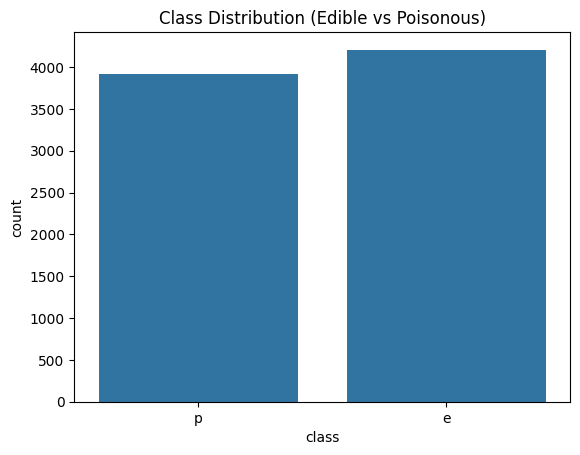

In [14]:
# Class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode all categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

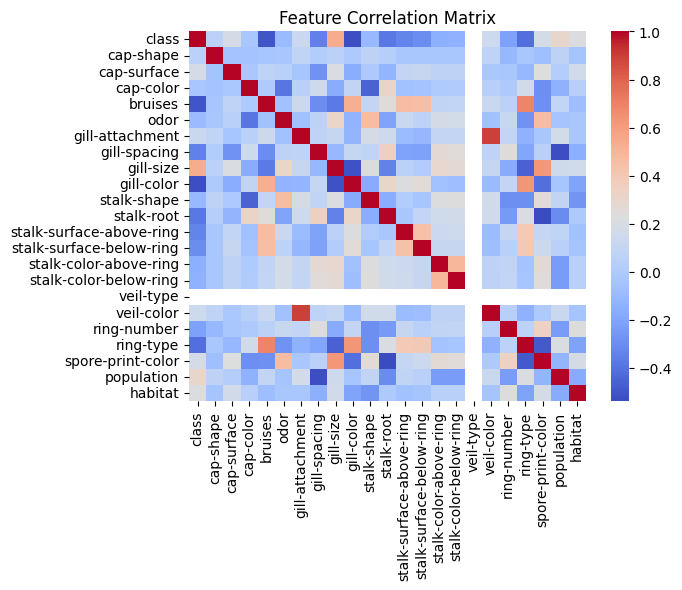

In [16]:
# Pair plot (optional, takes time on large datasets)
# sns.pairplot(df.sample(500), hue='class')
# plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred = svm_rbf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9926153846153846
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



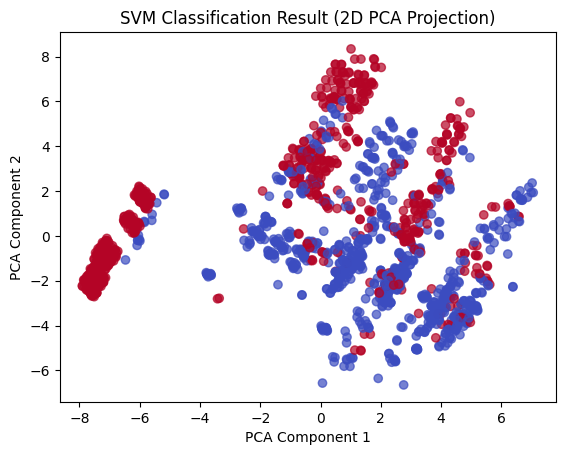

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title("SVM Classification Result (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


SVM Kernel Comparison on Mushroom Dataset

Kernel: linear
Accuracy: 0.9729
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       843
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

--------------------------------------------------


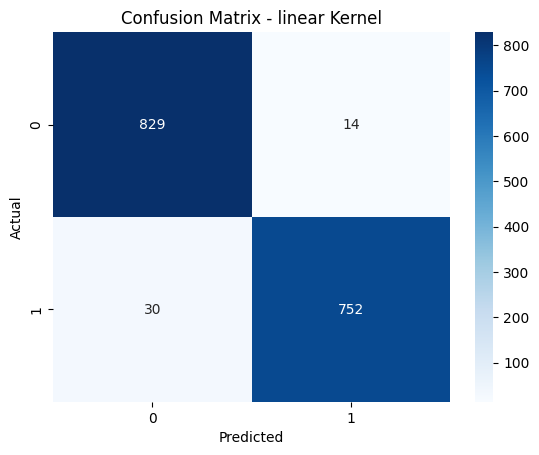

Kernel: poly
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

--------------------------------------------------


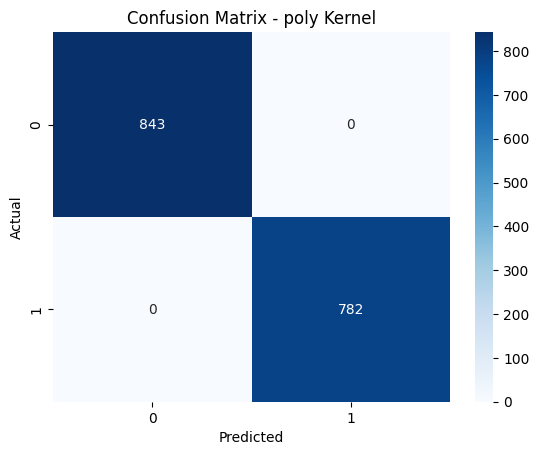

Kernel: rbf
Accuracy: 0.9926
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

--------------------------------------------------


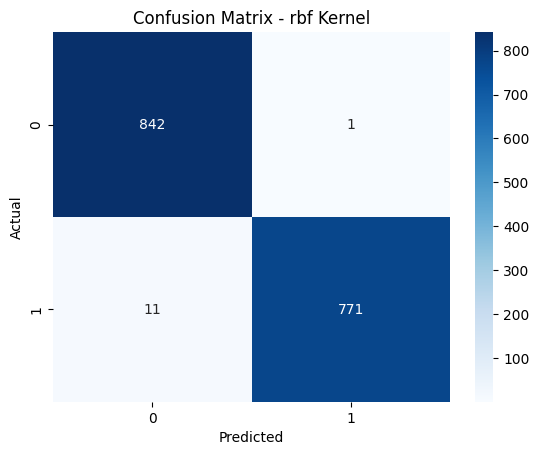

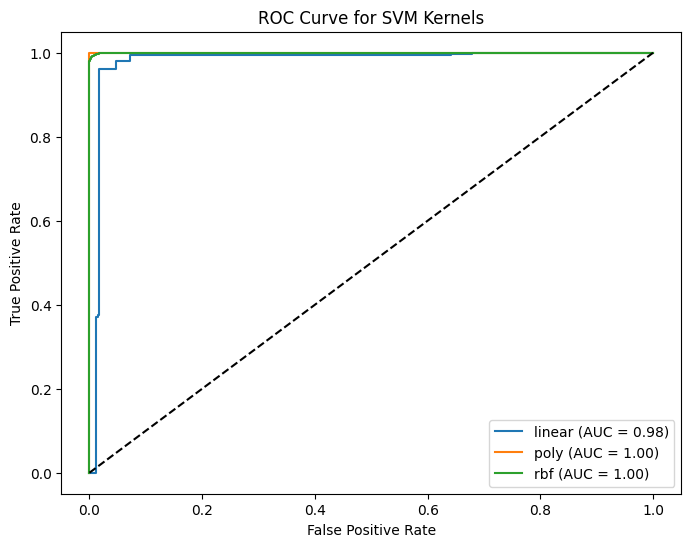

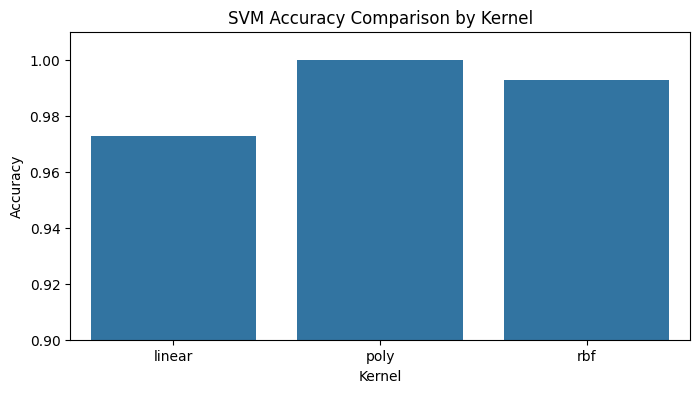

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

kernels = ['linear', 'poly', 'rbf']
results = {}
roc_data = {}

print("SVM Kernel Comparison on Mushroom Dataset\n")

for kernel in kernels:
    print(f"Kernel: {kernel}")
    clf = SVC(kernel=kernel, C=1.0, gamma='scale', probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    results[kernel] = acc

    # Confusion Matrix for each kernel
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {kernel} Kernel')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve data for each kernel
    y_prob = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[kernel] = (fpr, tpr, roc_auc)

# Plot ROC curves for all kernels together
plt.figure(figsize=(8, 6))
for kernel in kernels:
    fpr, tpr, roc_auc = roc_data[kernel]
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Kernels')
plt.legend()
plt.show()

# Visualization of accuracy
plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('SVM Accuracy Comparison by Kernel')
plt.ylabel('Accuracy')
plt.xlabel('Kernel')
plt.ylim(0.9, 1.01)
plt.show()